In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [12]:
X.shape, y.shape

((50000, 15), (50000,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [16]:
from sklearn import linear_model

In [33]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [34]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.21 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.23 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.27 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [35]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

# Logistic Regression using SGD

In [17]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [29]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

#sigmoid function
def sigmoid(w,x,b):
    return 1/(1 + np.exp(-(np.dot(x,np.transpose(w)) + b)))

In [31]:
#computing log loss
#modified python assignment Q10 solution
def compute_log_loss(w,x,y,b):
    #sigmoid returns the probability scores 
    score = sigmoid(w,x,b)
    n = len(y)
    loss = 0
    for i in range(n):
        loss += (y[i]*np.log10(score[i]) + (1-y[i])*np.log10(1-score[i]))
    loss = -(1/n)*loss
    return loss

In [22]:
def LR_SGD(x_train,y_tr,x_test,y_tst,w,b,eta0,alpha,epoch,N):
    log_loss_train = [] # creating log_loss empty list
    log_loss_test = []
    #iterating for each epoch to find the loss
    for epch in range(epoch):
        #iterating on each training data point to update the weights
        for i in range(N):
            #updating w
            w = ((1 - eta0*(alpha/N))*w)  + ((alpha*x_train[i])*(y_tr[i] - sigmoid(w,x_train[i],b)))
            #updating b
            b = b + eta0*(y_tr[i] - sigmoid(w,x_train[i],b))
        
        #computing log_loss for train data on this epoch
        loss_train = compute_log_loss(w,x_train,y_tr,b)
        
        #computing log_loss for test data on this epoch
        loss_test = compute_log_loss(w,x_test,y_tst,b)
        
        log_loss_train.append(loss_train)
        log_loss_test.append(loss_test)
    return w,b,log_loss_train,log_loss_test
            

In [32]:
epoch = 10
w,b,log_loss_train,log_loss_test = LR_SGD(X_train,y_train,X_test,y_test,w,b,eta0,alpha,epoch,N)

In [36]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 0.0002138 ,  0.00548413,  0.00270918, -0.00329416, -0.00377953,
          0.00509399,  0.00704126,  0.00237134,  0.00867994, -0.01106728,
         -0.00183147, -0.00192361,  0.00178909,  0.00029817, -0.00052487]]),
 array([0.00304153]))

# Observations

1. The difference between the sklearn implemenation resulting w and b , with the custom implementation is of the order 10^-3 as desired

In [37]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.95536
0.95296


# Plotting the loss

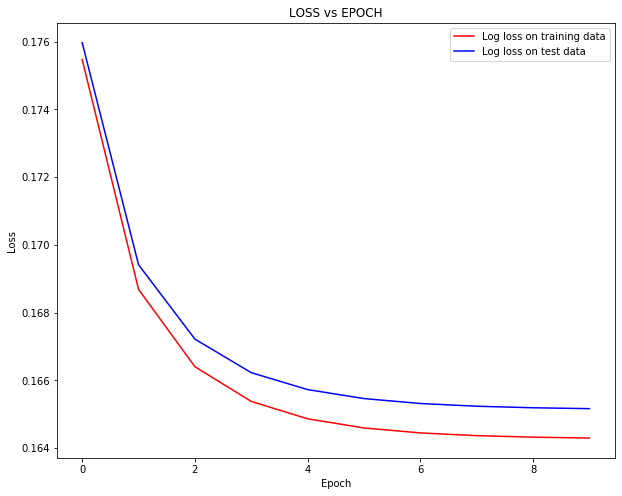

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(log_loss_train,color='red',label = 'Log loss on training data')

plt.plot(log_loss_test,color='blue',label = 'Log loss on test data')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LOSS vs EPOCH')
plt.show()